# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/)

Inkubator Uniwersytetu Warszawskiego

## 4. Random Forest Regression

In simple words: random forest which persorm regression task. But what exactly is random forest?  

For now let's stick to scikit-learn documentation definition: 

_A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the **predictive accuracy** and control **over-fitting**._

more: http://blog.yhat.com/posts/random-forests-in-python.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
bicycles_weather_data = pd.read_csv("data/dane_zsumowane_z_pogoda.csv", index_col=0)

## Validating model performance

Two most common approaches:

- test/train split

- crossvalidation

In [39]:
cols = ['temp_avg', 'temp_min', 'temp_max', 'snieg', 'deszcz']
street = 'Banacha'
bicycles_weather_subset = bicycles_weather_data[cols + [street]]
bicycles_weather_subset = bicycles_weather_subset.dropna()

In [40]:
X = bicycles_weather_subset[cols]
y = bicycles_weather_subset[street]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Decision Trees

Before we will take a look at the whole forest, let's consider single tree. :)

Decision trees are very powerful tool, easy to understand and visualize.

![source: wikipedia.org](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

See also:

* [A visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

### Random Forest

In principles it means that many decision trees (forest) are fitted to sampled data (random) and the final decision bases on votes from all trees.

Materials:
 - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
 - https://www.youtube.com/watch?v=zvUOpbgtW3c

In [42]:
# n_estimators - # of trees in the forest.
# criterion - the function to measure the quality of a split either mse or mae

rforest = RandomForestRegressor(n_estimators=100, criterion='mse')

Compare the code below with Linear Regression. It's basically the same!

In [43]:
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Model evaluation

In [44]:
rforest.score(X_train, y_train)

0.96534592129127728

In [45]:
rforest.score(X_test, y_test)

0.74987977066843059

http://scikit-learn.org/stable/modules/model_evaluation.html

In [46]:
y_pred = rforest.predict(X_test)
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("RMSE: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("R^2: {:.2f}".format(metrics.r2_score(y_test, y_pred)))

MAE: 528.51
RMSE: 704.09
R^2: 0.75


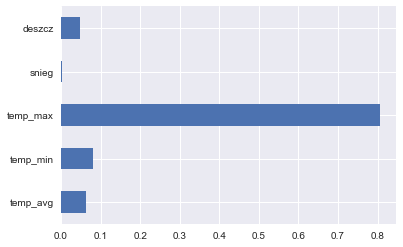

In [47]:
pd.Series(rforest.feature_importances_, index=cols).plot(kind='barh')

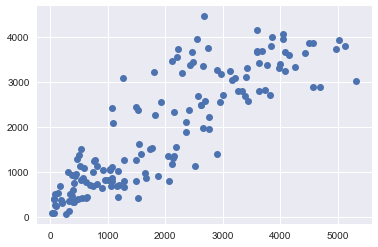

In [49]:
plt.plot(y_test, y_pred, 'o')

What is $R^2$?

$$
R^2 = 1 - \frac{SS_{\mathrm{resid}}}{SS_{\mathrm{total}}}
$$

[Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)